In [17]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [18]:
pose_csv = 'Z:/KayCei/Naturalistic Closed Loop/2nd cohort/AD12-D1/Videos/022324-Face Groom/VideoOutputCamera 0-23022024-123834DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(119162, 12)


In [19]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
Z:/KayCei/Naturalistic Closed Loop/2nd cohort/AD12-D1/Videos/022324-Face Groom


### original data table

In [20]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               262.855499  202.145081   
3                                               265.448975  222.258743   
6                                               276.782501  247.847931   
9                                               281.389526  276.902405   
12                                              282.582001  297.357483   
15                                              274.582123  346.361267   
18                                              272.146576  380.448547   
21                                              270.299042  409.220886   
24                                              273.644562  432.312836   
27                                              276.682861  472.364929   
30                                              264.875366  475.124847   
33                                              266.185120  481.084747   
36                                              275.480682  502.476105   
39                                              269.836273  534.871399   
42                                              273.245636  552.598694   
45                                              279.649536  566.394958   
48                                              278.119385  585.362366   
51                                              281.416443  594.272278   
54                                              275.919281  592.844543   
57                                              273.785828  589.435242   
60                                              281.273651  591.598450   
63                                              281.647522  589.879395   
66                                              299.665466  586.285828   
69                                              299.855469  584.072876   
72                                              274.481567  591.578613   
75                                              276.801147  594.130676   
78                                              274.422302  596.245972   
81                                              844.366760  581.203186   
84                                              282.117218  591.373352   
87                                              274.560760  568.157043   
90                                              273.777222  558.081543   
93                                              270.091553  558.197327   
96                                              272.365509  562.696899   
99                                              844.076904  580.976868   
102                                             844.527405  580.298828   
105                                             276.829895  537.109009   
108                                             843.097412  581.686218   
111                                             310.612335  570.426514   
114                                             316.293243  566.660095   
117                                             317.539062  555.095642   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.999997    279.092407  187.317749   0.999790   276.484619   
3           0.999998    289.461609  208.016495   0.999991   274.678864   
6           0.999933    293.967102  227.238617   0.995439   275.257416   
9           0.999729    291.347931  228.190979   0.915264   290.813324   
12          0.999856    302.733459  291.144867   0.659489   289.675903   
15          0.999938    292.884033  323.853851   0.999827   272.297089   
18          0.999946    290.064697  323.162872   0.999997   262.524445   
21          0.999983    297.230957  383.036346   0.999972   266.520020   
24 

### after removing likelihood and headers

In [21]:
pose[:5, :]

array([[262.85549927, 202.14508057, 279.09240723, 187.31774902,
        276.48461914, 172.26573181, 348.46490479, 206.05595398,
        335.23233032, 163.88598633, 365.31188965, 185.72277832],
       [262.61959839, 202.12039185, 278.14810181, 187.19403076,
        276.83724976, 171.33091736, 349.25137329, 207.1452179 ,
        335.43353271, 164.07058716, 364.90988159, 185.47828674],
       [264.46466064, 209.59031677, 280.47775269, 190.46052551,
        275.59509277, 173.19317627, 346.85626221, 207.96258545,
        335.42721558, 163.92669678, 362.99795532, 186.16201782],
       [265.44897461, 222.25874329, 289.46160889, 208.01649475,
        274.67886353, 168.50285339, 348.3890686 , 207.80209351,
        335.38247681, 163.69180298, 362.18621826, 184.86567688],
       [266.18777466, 231.24830627, 290.0687561 , 209.94688416,
        275.67156982, 170.90499878, 348.97583008, 207.29089355,
        335.64053345, 164.39572144, 360.22702026, 183.09008789]])

### plot

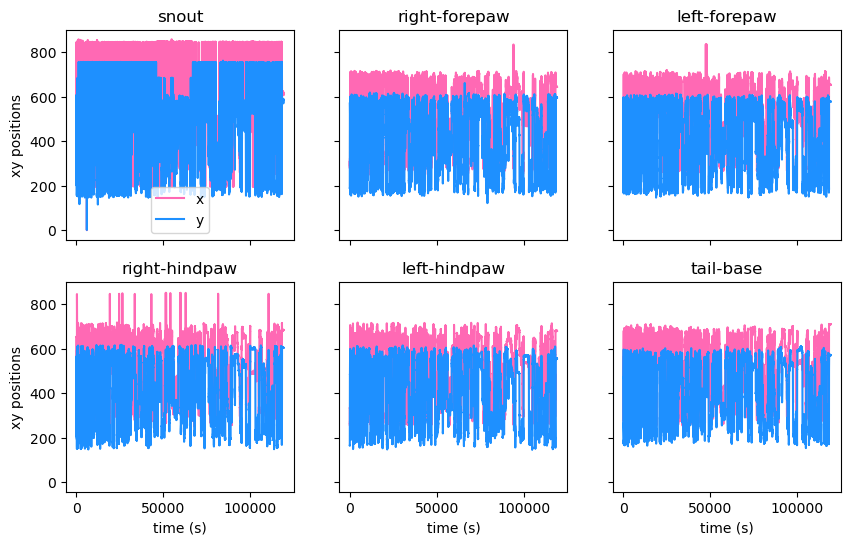

In [22]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [23]:
np.save('../processed_data/pose_video_exp_16.npy', pose)